# SVM o máquinas de vectores de soporte

La idea detrás de SVM es encontrar un plano que separe los grupos dentro de los datos de la mejor forma posible. Aquí, la separación significa que la elección del plano maximiza el margen entre los puntos más cercanos en el plano; estos puntos se denominan vectores de soporte.<br>
Las máquinas vectoriales de soporte (SVM) son un potente algoritmo de aprendizaje supervisado que se utiliza para la clasificación o para la regresión. Los SVMs son un clasificador discriminatorio: es decir, trazan un límite entre grupos de datos.



Las máquinas vectoriales de soporte (SVM) son un potente algoritmo de aprendizaje supervisado que se utiliza para la clasificación o para la regresión. Los SVMs son un clasificador discriminatorio: es decir, trazan un límite entre grupos de datos.

La máquina vectorial de soporte (SVM) aprende un hiperplano para clasificar los datos en 2 clases

Un hiperplano es una función como la ecuación de una recta, y = mx + b. De hecho, para una simple tarea de clasificación con sólo 2 características, el hiperplano puede ser una recta.

SVM puede realizar un truco para proyectar sus datos en dimensiones superiores. Una vez que se proyecta en dimensiones superiores....
...SVM calcula el mejor hiperplano que separa sus datos en las dos clases.

¿Tienes un ejemplo? 
Absolutamente, el ejemplo más simple que encontré comienza con un montón de bolas rojas y azules en una mesa. Si las bolas no están muy mezcladas, puedes tomar un palo y sin moverlo, separarlas con el palo.


Verás:

Cuando se añade una nueva bola a la mesa, sabiendo en qué lado del palo está la bola, se puede predecir su color.


¿Qué representan las bolas, la mesa y el palo? 
Las bolas representan puntos de datos, y el color rojo y azul representan 2 clases. El palo representa el hiperplano que en este caso es una línea.


El SVM calcula la función para el hiperavión

¿Y si las cosas se complican? 
Claro, lo hacen con frecuencia. Si las bolas se mezclan, un palo recto no funcionará.

Aquí está la solución:

Levante rápidamente la mesa lanzando las bolas al aire. Mientras las bolas están en el aire y se lanzan de la manera correcta, se utiliza una hoja grande de papel para dividir las bolas en el aire.


No, levantar la mesa es el equivalente a mapear sus datos a dimensiones más altas. En este caso, pasamos de la superficie de la mesa de 2 dimensiones a las bolas tridimensionales en el aire.

Cómo lo hace el SVM

Usando un kernel tenemos una buena forma de operar en dimensiones superiores. La gran hoja de papel todavía se llama hiperplano, pero ahora es una función de un plano en lugar de una línea. Nota de Yuval que una vez que estamos en 3 dimensiones, el hiperplano debe ser un plano en lugar de una línea.
Estos videos explicativos pueden ser muy útiles para reforzar el concepto de SVM:

https://www.youtube.com/watch?time_continue=23&v=3liCbRZPrZA

https://www.youtube.com/watch?v=1NxnPkZM9bc


¿Cómo hacen las bolas en una mesa o en el mapa aéreo para obtener datos de la vida real?<br>
Una bola en una mesa tiene una ubicación que podemos especificar usando coordenadas. Por ejemplo, una pelota puede estar a 20 cm del borde izquierdo y a 50 cm del borde inferior. Otra manera de describir la bola es como (x, y) coordenadas o (20, 50). x e y son 2 dimensiones de la bola.<br>
Este es el trato:<br>
Si tuviéramos un conjunto de datos de pacientes, cada paciente podría ser descrito por varias medidas como pulso, nivel de colesterol, presión arterial, etc. Cada una de estas medidas es una dimensión.<br>


La conclusión es que:<br>
El SVM hace lo suyo, los mapea a una dimensión superior y luego encuentra el hiperplano para separar las clases.


Los márgenes están a menudo asociados con el SVM? ¿Qué son ellos?<br>
El margen es la distancia entre el hiperplano y los 2 puntos de datos más cercanos de cada clase respectiva. En el ejemplo de bola y mesa, la distancia entre el palo y la bola roja y azul más cercana es el margen.


El SVM intenta maximizar el margen, de modo que el hiperplano esté tan lejos de la bola roja como la azul. De este modo, se reduce la posibilidad de que se produzcan errores de clasificación.

¿De dónde viene el nombre del SVM?<br>
Usando el ejemplo de la bola y la mesa, el hiperplano está equidistante de una bola roja y una azul. Estas bolas o puntos de datos se llaman vectores de apoyo, porque soportan el hiperplano.


Pasemos al ejemplo donde podamos practicar el concepto:
Primero crearemos un conjunto de datos para simular la tabla y las bolas:

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('bmh')

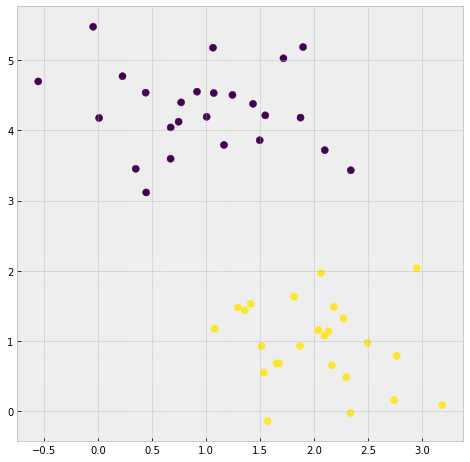

In [3]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50);


Un clasificador discriminatorio intenta trazar una línea entre los dos conjuntos de datos. Inmediatamente vemos un problema: ¡una línea así está mal colocada! Por ejemplo, podríamos encontrar varias posibilidades que discriminan perfectamente entre las clases de este ejemplo:

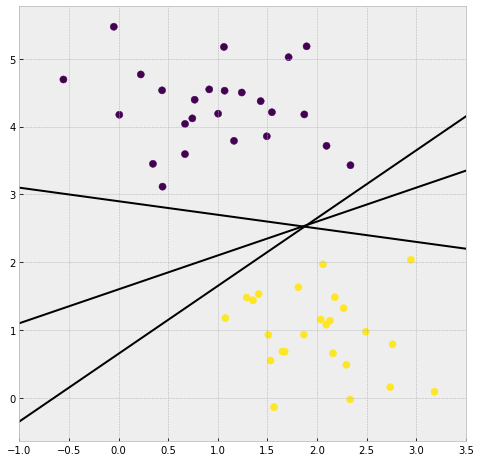

In [4]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);


Máquinas Vectoriales de Soporte: Maximizar el margen
Las máquinas vectoriales de soporte son una forma de abordar este problema. Lo que el vector de soporte mecanizado hace es no sólo dibujar una línea, sino considerar una región sobre la línea de un ancho determinado. He aquí un ejemplo de cómo podría ser:

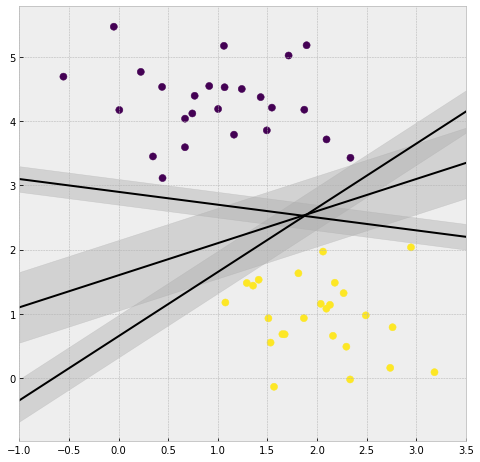

In [5]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(8,8))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);


Note aquí que, si queremos maximizar este ancho, el ajuste medio es claramente el mejor. Esta es la intuición de las máquinas vectoriales de soporte, que optimizan un modelo discriminante lineal junto con un margen que representa la distancia perpendicular entre los conjuntos de datos.

Montaje de una máquina vectorial de soporte<br>
Ahora ajustaremos un Clasificador de Vectores de Soporte a estos puntos. Aunque los detalles matemáticos del modelo de probabilidad son interesantes, le dejaremos leer sobre ellos en otra parte. En su lugar, trataremos el algoritmo scikit-learn como una caja negra que cumple la tarea anterior.


In [6]:
from sklearn.svm import SVC # "Support Vector Classifier"
clf = SVC(kernel='linear')
clf.fit(X, y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Para visualizar mejor lo que está sucediendo aquí, vamos a crear una función de conveniencia rápida que trazará los límites de las decisiones del SVM para nosotros:

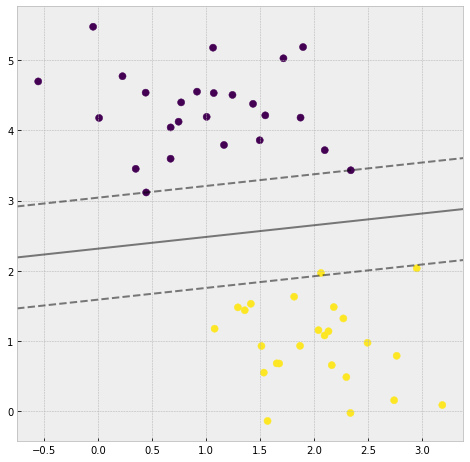

In [7]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf)

Observe que las líneas discontinuas tocan un par de puntos: estos puntos son las piezas centrales de este ajuste, y se conocen como los vectores de soporte (dando al algoritmo su nombre). En scikit-learn, estos se almacenan en el atributo support_vectors_ del clasificador:

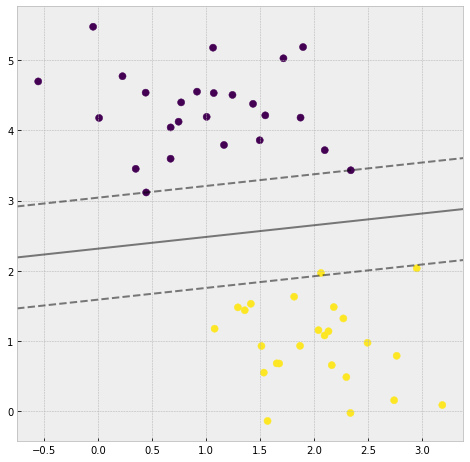

In [8]:
plt.figure(figsize=(8,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50)
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

ahora utilizamos un conjunto de datos de la vida real

In [12]:
# importanto SVM
from sklearn import svm
from sklearn.datasets import load_iris

# importando el dataset iris
iris = load_iris()
X = iris.data[:, :2]  # solo tomamos las primeras 2 características
y = iris.target

h = .02  # tamaño de la malla del grafico

# Creando el SVM con sus diferentes métodos
C = 1.0  # parametro de regulacion SVM 
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)


c:\users\jhovanny.canas.pino\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\jhovanny.canas.pino\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [13]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


In [14]:
# titulos de los graficos
titles = ['SVC con el motor lineal',
          'LinearSVC',
          'SVC con el motor RBF',
          'SVC con el motor polinomial']


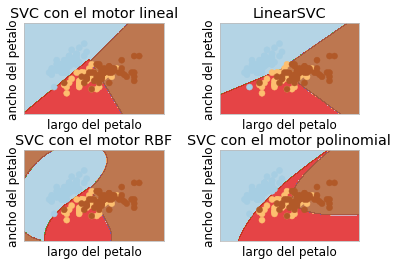

In [15]:
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Realizando el gráfico, se le asigna un color a cada punto
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Graficando tambien los puntos de datos
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('largo del petalo')
    plt.ylabel('ancho del petalo')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()


Reconocimiento y agradecimiento especial a:

- [Kevin Markham](https://github.com/justmarkham)
- [Janani Ravi](https://www.pluralsight.com/authors/janani-ravi)

In [2]:
from IPython.core.display import HTML
def css_styling():
    styles = open("estilos/custom.css", "r").read()
    return HTML(styles)
css_styling()

### Ejemplo de SVM para clasificacion de imagenes

In [4]:
import pandas as pd
mnist_data = pd.read_csv("data/mnist/train.csv")

In [5]:
mnist_data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
caracteristicas = mnist_data.columns[1:]
X = mnist_data[caracteristicas]
Y = mnist_data['label']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X/255., Y, test_size= 0.1, random_state = 1)

In [10]:
from sklearn.svm import LinearSVC

In [16]:
claf_svm = LinearSVC(random_state=0, tol=1e-5)

In [17]:
claf_svm.fit(x_train, y_train)

c:\users\jhovanny.canas.pino\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
predicciones = claf_svm.predict(x_test)

In [22]:
exactitud = accuracy_score(y_test, predicciones)
print ("La exactitud del modelo es: ", exactitud)

La exactitud del modelo es:  0.9123809523809524
